In [ ]:
# Author : Namrata Chanda
# GRIP @ SPARKS FORUNDATION
# TASK 1 : Prediction Using Unsupervised ML 
# From the given 'Iris' dataset predict the optimum number of clusters and represent it visually

In [13]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
# Loading the Iris dataset frim sklearn
iris_data = datasets.load_iris()
iris_x_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_x_df.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [15]:
iris_x_df.shape

(150, 4)

In [16]:
iris_x_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [17]:
iris_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [18]:
#  Using 'Elbow Method' to find optimum number of cluster
from sklearn.cluster import KMeans
x = iris_x_df.iloc[:, :].values
wcs = []

for i in range(1,21):
    model=KMeans(n_clusters = i,init = 'k-means++',max_iter=250,n_init=15,random_state=0)
    model.fit(x)
    wcs.append(model.inertia_)
    
print (wcs)

[681.3705999999996, 152.34795176035797, 78.851441426146, 57.22847321428572, 46.44618205128204, 39.03998724608725, 34.299712121212146, 30.063110617452732, 28.124129261089806, 26.094324740540422, 24.492395286730822, 22.713918404916985, 21.690983282068828, 20.049091382301917, 18.898246810207333, 17.905960735171274, 16.890723502597073, 16.46601160097213, 15.280046703296708, 14.904289072039074]


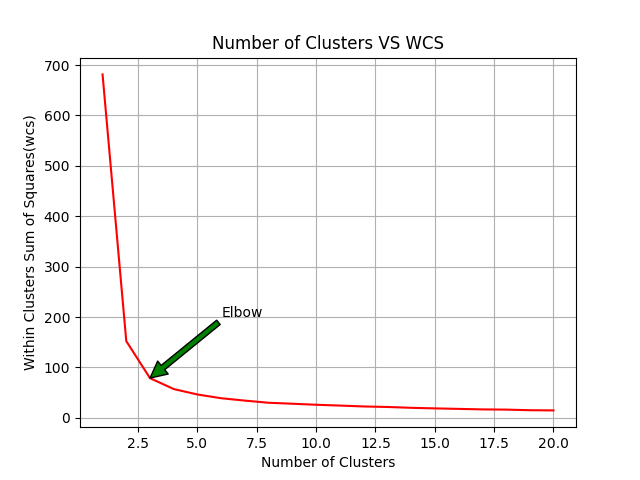

In [19]:
# Plotting the result (line graph)
plt.plot(range(1,21),wcs,color='r')
plt.title('Number of Clusters VS WCS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(wcs)')
plt.annotate('Elbow',xytext=(6,200),xy=(3,79),arrowprops={'facecolor':'green'})
plt.grid()
plt.show()

In [ ]:
# Elbow occurs where the graph bends with wcs does not decease significantly with every iteration
# So optimum number of dataset = 3

In [20]:
# Create and Train the Model(KMeans)
model = KMeans(n_clusters=3,init='k-means++',max_iter=250,n_init=15,random_state=0)
y = model.fit_predict(x)

In [21]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

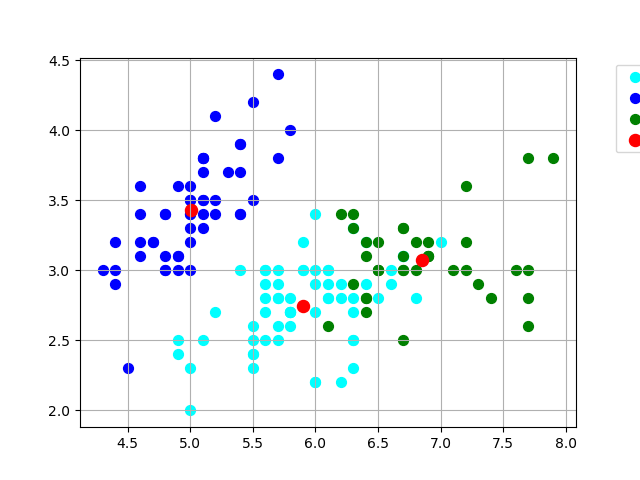

In [22]:
#  Visulaizing the clusters by plotting scatter Graph
plt.scatter(x[y==0, 0],x[y==0, 1],
           s=50,c='cyan',label='Iris-setosa')
plt.scatter(x[y==1, 0],x[y==1, 1],
           s=50,c='blue',label='Iris-versicolour')
plt.scatter(x[y==2, 0],x[y==2, 1],
           s=50,c='green',label='Iris-virgininica')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
            s=75,c='red',label='Centroids')
plt.legend(loc=1,bbox_to_anchor=(1.4,1))
plt.grid()
plt.show()

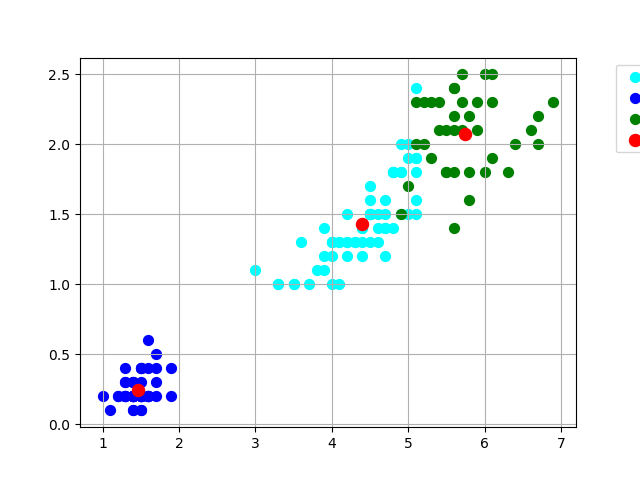

In [23]:
plt.scatter(x[y==0, 2],x[y==0, 3],
           s=50,c='cyan',label='Iris-setosa')
plt.scatter(x[y==1, 2],x[y==1, 3],
           s=50,c='blue',label='Iris-versicolour')
plt.scatter(x[y==2, 2],x[y==2, 3],
           s=50,c='green',label='Iris-virgininica')
plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,3],
            s=75,c='red',label='Centroid')
plt.legend(loc=1,bbox_to_anchor=(1.4,1))
plt.grid()
plt.show()

In [ ]:
# Thankyou